In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
strrev = lambda y: str(''.join([_ for _ in reversed(y)]))
def get_label(dct):
    if float(dct['α']) == 0:
        return '1_OLS'
    elif float(dct['l1r']) == 1:
        return f'2_L1, α={dct["α"]}'
    elif float(dct['l1r']) == 0:
        return f'3_L2, α={dct["α"]}'
    else:
        return f'4_l1r={dct["l1r"]}, α={dct["α"]}'
    return

In [5]:
# file_loc = r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs\final_outputs_rev\Figure_3-mse_sctr.csv'

# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps/Figure_1_2-mse_sctr.csv'
# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps-wds/Figure_1_2-mse_sctr.csv'

# file_loc_lst = [
#     r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps/Figure_1_2-mse_sctr.csv',
#     r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps-wds/Figure_1_2-mse_sctr.csv'
# ]
file_loc_lst = [
    r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs-old/run_20230404--20_20sft/Figure_1_2_g1--20_20sft-mse_sctr.csv',
#     r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs-old/run_20230404--20_20sft/Figure_7_g1--20_20sft-mse_sctr.csv',
#     r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs-old/final_outputs-old-wds/Figure_1_2-mse_sctr.csv'
]

for file_loc in file_loc_lst:
    concat = pd.read_csv(file_loc)
    
#     run_name = concat.loc[0, 'name']
    
    concat['model_version'] = concat['model_version'].str.replace('max_iter10000__fit_interceptFalse__',  '')
    concat['model_version'] = concat['model_version'].str.replace('____',  '.')
    concat['model_version'] = concat['model_version'].str.replace('alpha','α=')
    concat['model_version'] = concat['model_version'].str.replace('l1_ratio','l1r=')
    concat['model_version'] = concat['model_version'].str.replace('base_','')
    concat['model_version'] = concat['model_version'].str.replace('simple_','')
    concat['model_version'] = concat['model_version'].str.replace('words_','')
    concat['model_version'] = concat['model_version'].apply(lambda x: ([{_.split('=')[0]: strrev(strrev(_.split('=')[1]).zfill(4))} for _ in x.split('__')]))#.str.zfill(4)
    concat['model_version'] = concat['model_version'].apply(lambda x: {k: v for d in x for k, v in d.items()})#.str.zfill(4)

    concat['label'] = concat['model_version'].apply(lambda x: get_label(x))
    concat = concat.drop('model_version', axis=1)

    # concat = concat.set_index(['channel', 'name', 'model_version', 'run_num']).drop('mouse_id', axis=1)
    concat = concat.set_index(['channel', 'name', 'label', 'run_num']).drop('mouse_id', axis=1)

    # vbp['model_version'].apply(lambda x: [[_.split('=')[0], strrev(strrev(_.split('=')[1]).zfill(4))] for _ in x.split('__')])#.str.zfill(4)
    

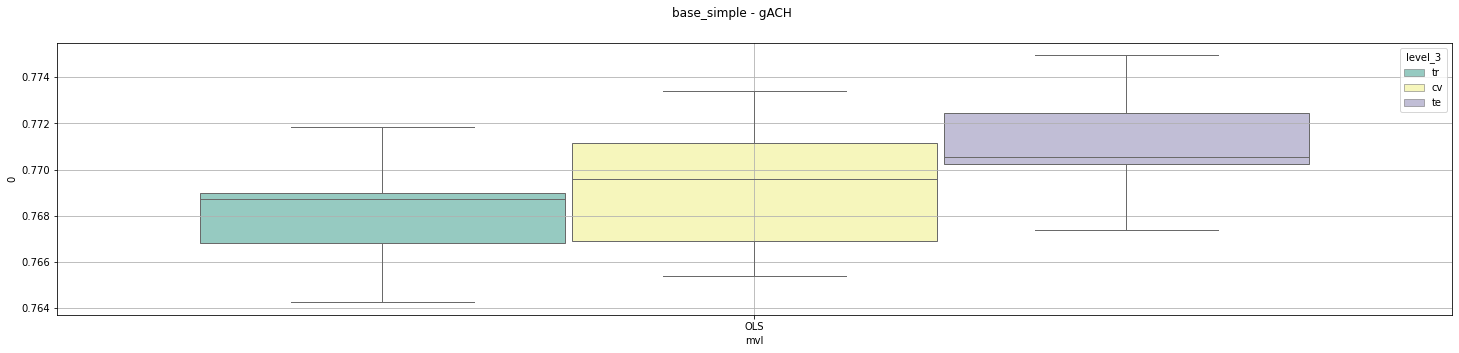

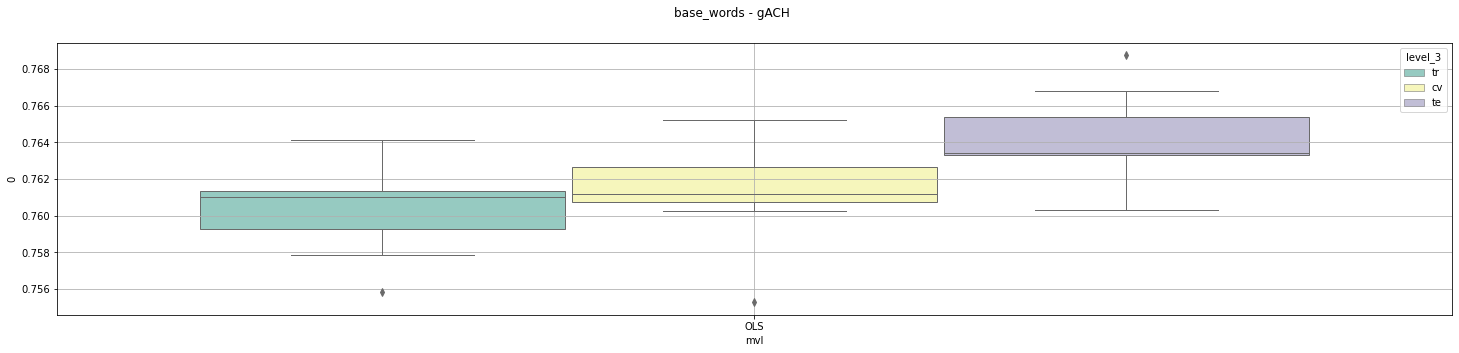

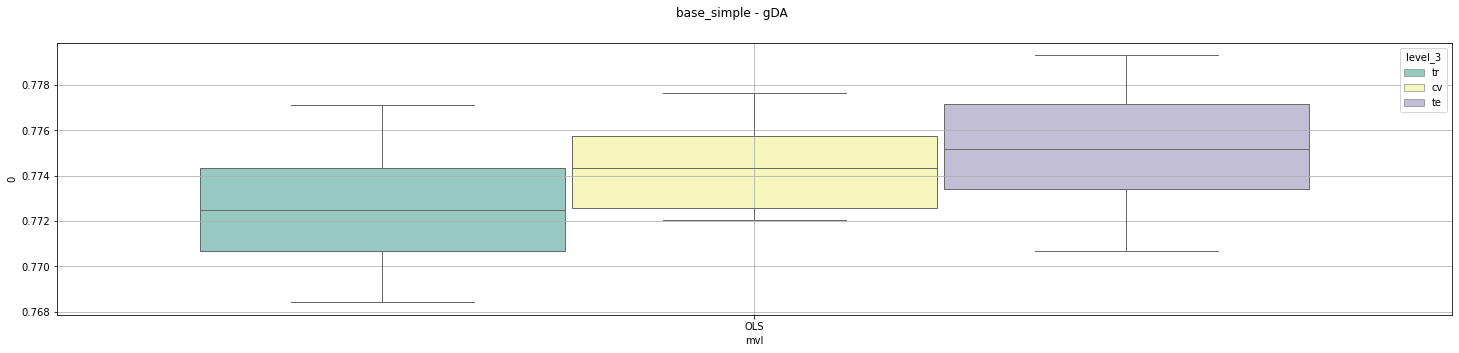

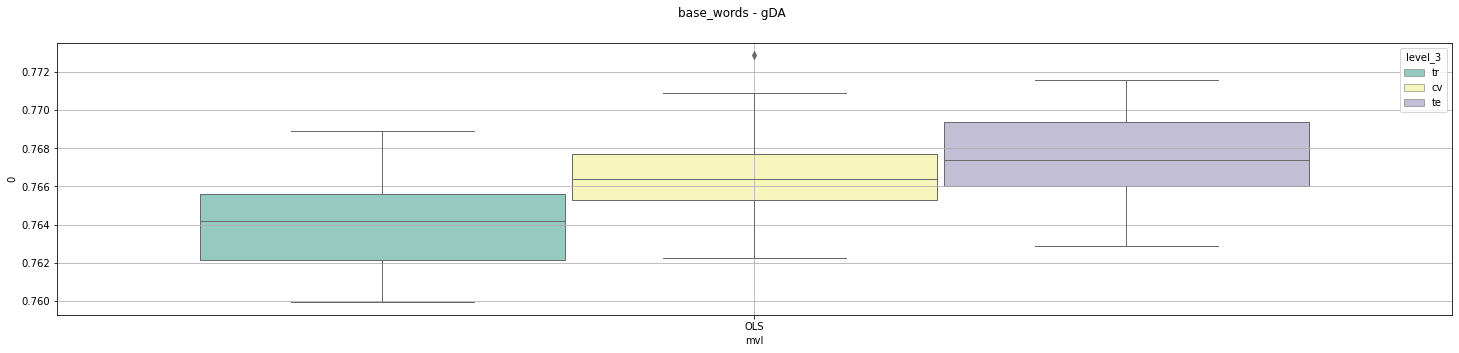

In [6]:
    # OUTPUT OPTION #1 - Separate plots for each name / channel

    for chl in concat.reset_index()['channel'].unique():
        chl_concat = concat.query(f"channel == '{chl}'")
        for nm in chl_concat.reset_index()['name'].unique():
            chl_nm_concat = chl_concat.query(f"name == '{nm}'")

            fig, ax = plt.subplots(1,1,figsize=(25,5))

            fig.suptitle(f'{nm} - {chl}')
            fig.set_facecolor('w')

            vwyc = chl_nm_concat.loc[chl].values
            ymn, ymx = np.min(vwyc), np.max(vwyc)

            vbp = chl_nm_concat.loc[chl].rename({'mse_tr':'1_tr', 'mse_cv':'2_cv', 'mse_te':'3_te'}, axis=1).stack().reset_index()
            vbp['mvl'] = vbp['label']
        #     vbp['mvl'] = vbp['label'] + ' / ' + vbp['level_3']
        #     vbp['mvl'] = vbp['level_3'] + ' / ' + vbp['label']
            vbp['mvl'] = vbp['mvl'].str.replace('simple_', '')
            vbp = vbp.sort_values(['mvl', 'level_3'])

            vbp['mvl'] = vbp['mvl'].apply(lambda x: x.split('_')[-1])
            vbp['level_3'] = vbp['level_3'].apply(lambda x: x.split('_')[-1])

            sns.boxplot(data=vbp, x='mvl', y=0, hue='level_3', palette="Set3", linewidth=1, ax=ax)
            ax.grid(True)
            plt.xticks(rotation=0)

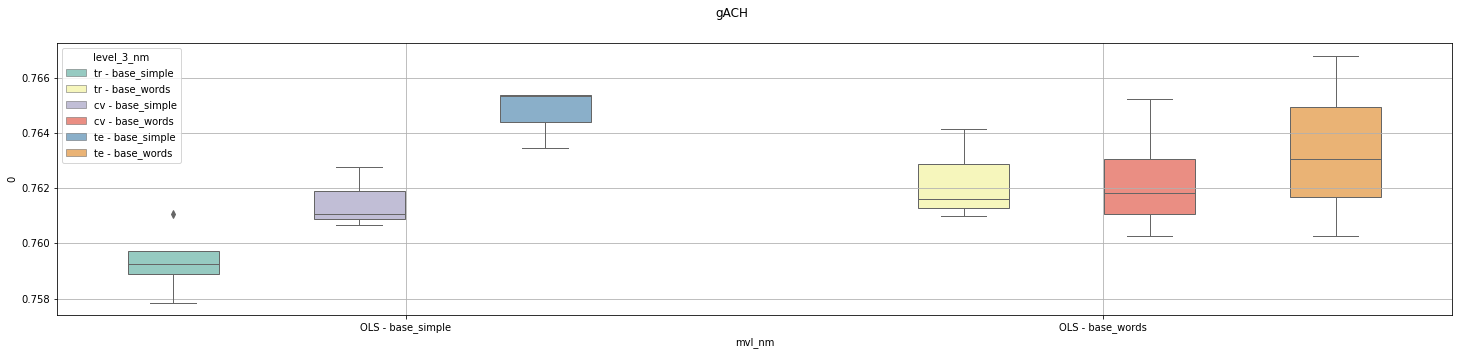

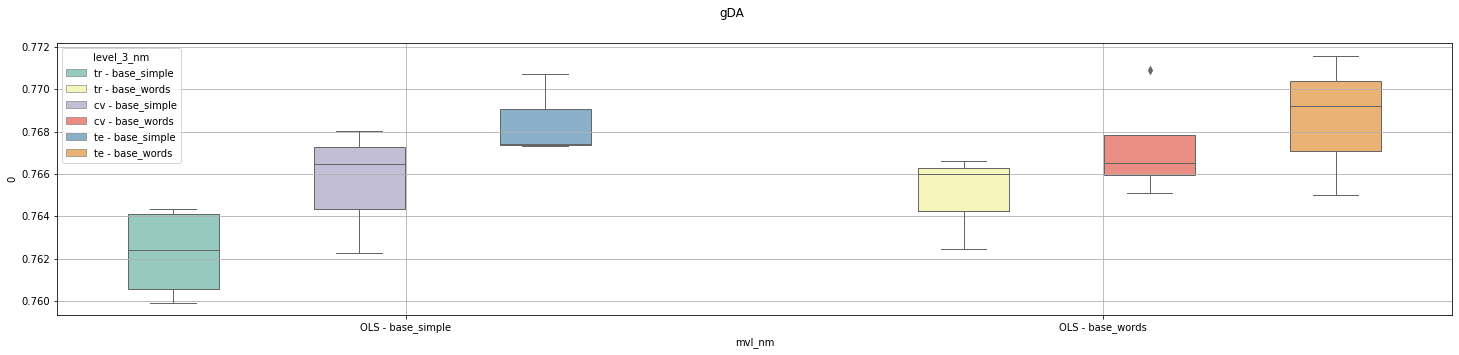

In [7]:
    # OUTPUT OPTION #2 - Separate plots by channel - combined names

    for chl in concat.reset_index()['channel'].unique():
        chl_concat = concat.query(f"channel == '{chl}'")
        fig, ax = plt.subplots(1,1,figsize=(25,5))
        
        fig.suptitle(f'{chl}')
        fig.set_facecolor('w')

#         for nm in chl_concat.reset_index()['name'].unique():
        chl_nm_concat = chl_concat.query(f"name == '{nm}'")


        vwyc = chl_nm_concat.loc[chl].values
        ymn, ymx = np.min(vwyc), np.max(vwyc)

        vbp = chl_nm_concat.loc[chl].rename({'mse_tr':'1_tr', 'mse_cv':'2_cv', 'mse_te':'3_te'}, axis=1).stack().reset_index()
        vbp['mvl'] = vbp['label']
    #     vbp['mvl'] = vbp['label'] + ' / ' + vbp['level_3']
    #     vbp['mvl'] = vbp['level_3'] + ' / ' + vbp['label']
        vbp['mvl'] = vbp['mvl'].str.replace('simple_', '')
        vbp = vbp.sort_values(['mvl', 'level_3'])

        vbp['mvl'] = vbp['mvl'].apply(lambda x: x.split('_')[-1])
        vbp['mvl_nm'] = vbp['mvl'] + ' - ' + chl_concat.reset_index()['name']
        vbp['level_3'] = vbp['level_3'].apply(lambda x: x.split('_')[-1])
        vbp['level_3_nm'] = vbp['level_3'] + ' - ' + chl_concat.reset_index()['name']


        sns.boxplot(data=vbp, x='mvl_nm', y=0, hue='level_3_nm', palette="Set3", linewidth=1, ax=ax)
        ax.grid(True)
        plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'OLS - base_simple - gACH'),
  Text(1, 0, 'OLS - base_words - gACH'),
  Text(2, 0, 'OLS - base_simple - gDA'),
  Text(3, 0, 'OLS - base_words - gDA')])

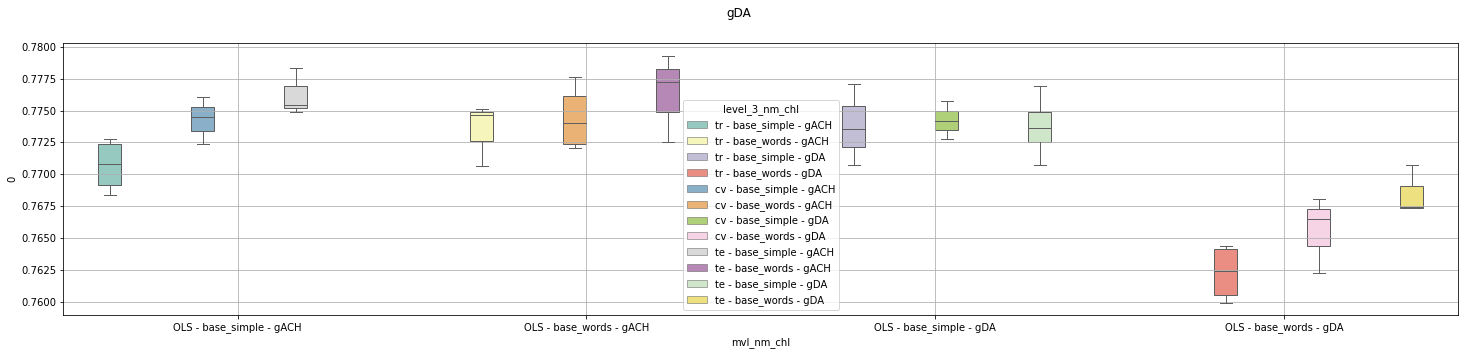

In [8]:
    # OUTPUT OPTION #3 - Combined plot for names + channels
    
    fig, ax = plt.subplots(1,1,figsize=(25,5))

    fig.suptitle(f'{chl}')
    fig.set_facecolor('w')

    vwyc = concat.loc[chl].values
    ymn, ymx = np.min(vwyc), np.max(vwyc)

    vbp = concat.loc[chl].rename({'mse_tr':'1_tr', 'mse_cv':'2_cv', 'mse_te':'3_te'}, axis=1).stack().reset_index()
    vbp['mvl'] = vbp['label']
    vbp['mvl'] = vbp['mvl'].str.replace('simple_', '')
    vbp = vbp.sort_values(['mvl', 'level_3'])

    vbp['mvl'] = vbp['mvl'].apply(lambda x: x.split('_')[-1])
    vbp['mvl_nm_chl'] = vbp['mvl'] + ' - ' + concat.reset_index()['name'] + ' - ' + concat.reset_index()['channel']
    vbp['level_3'] = vbp['level_3'].apply(lambda x: x.split('_')[-1])
    vbp['level_3_nm_chl'] = vbp['level_3'] + ' - ' + concat.reset_index()['name'] + ' - ' + concat.reset_index()['channel']


    sns.boxplot(data=vbp, x='mvl_nm_chl', y=0, hue='level_3_nm_chl', palette="Set3", linewidth=1, ax=ax)
    ax.grid(True)
    plt.xticks(rotation=0)

In [9]:
concat

mse_tr    mse_cv    mse_te
channel name        label run_num                              
gACH    base_simple 1_OLS num=0    0.768591  0.770102  0.770616
                          num=1    0.767288  0.771473  0.771961
                          num=2    0.766687  0.769187  0.772584
                          num=3    0.765623  0.766521  0.773735
                          num=4    0.768978  0.768124  0.770406
                          num=5    0.771843  0.772859  0.767362
                          num=6    0.769010  0.773422  0.770200
                          num=7    0.764247  0.766200  0.774944
                          num=8    0.769228  0.765396  0.770006
                          num=9    0.768866  0.769997  0.770438
        base_words  1_OLS num=0    0.761058  0.762764  0.763452
                          num=1    0.759260  0.761053  0.765347
                          num=2    0.759269  0.760674  0.765357
                          num=3    0.757856  0.761311  0.766795
                          num=4    0.761596  0.765240  0.763063
                          num=5    0.764142  0.762341  0.760281
                          num=6    0.760997  0.760251  0.763392
                          num=7    0.755817  0.755265  0.768743
                          num=8    0.761278  0.763964  0.763275
                          num=9    0.761368  0.760941  0.763327
gDA     base_simple 1_OLS num=0    0.769412  0.772350  0.778367
                          num=1    0.772780  0.776098  0.774912
                          num=2    0.772213  0.774477  0.775431
                          num=3    0.768406  0.772490  0.779313
                          num=4    0.770659  0.772051  0.777212
                          num=5    0.775139  0.777635  0.772517
                          num=6    0.774628  0.775620  0.773154
                          num=7    0.773565  0.772776  0.774147
                          num=8    0.777111  0.774181  0.770685
                          num=9    0.770712  0.775783  0.776943
        base_words  1_OLS num=0    0.760758  0.762251  0.770731
                          num=1    0.764335  0.768022  0.767326
                          num=2    0.764040  0.766491  0.767411
                          num=3    0.759921  0.765123  0.771604
                          num=4    0.762474  0.766254  0.769202
                          num=5    0.766600  0.766803  0.765024
                          num=6    0.766004  0.770925  0.765581
                          num=7    0.764414  0.765717  0.767254
                          num=8    0.768886  0.772874  0.762898
                          num=9    0.762057  0.763543  0.769438

In [10]:
vbp

,name,label,run_num,level_3,0,mvl,mvl_nm_chl,level_3_nm_chl
0,base_simple,1_OLS,num=0,tr,0.769412,OLS,OLS - base_simple - gACH,tr - base_simple - gACH
3,base_simple,1_OLS,num=1,tr,0.772780,OLS,OLS - base_simple - gACH,tr - base_simple - gACH
6,base_simple,1_OLS,num=2,tr,0.772213,OLS,OLS - base_simple - gACH,tr - base_simple - gACH
9,base_simple,1_OLS,num=3,tr,0.768406,OLS,OLS - base_simple - gACH,tr - base_simple - gACH
12,base_simple,1_OLS,num=4,tr,0.770659,OLS,OLS - base_words - gACH,tr - base_words - gACH
15,base_simple,1_OLS,num=5,tr,0.775139,OLS,OLS - base_words - gACH,tr - base_words - gACH
18,base_simple,1_OLS,num=6,tr,0.774628,OLS,OLS - base_words - gACH,tr - base_words - gACH
21,base_simple,1_OLS,num=7,tr,0.773565,OLS,OLS - base_simple - gDA,tr - base_simple - gDA
24,base_simple,1_OLS,num=8,tr,0.777111,OLS,OLS - base_simple - gDA,tr - base_simple - gDA
27,base_simple,1_OLS,num=9,tr,0.770712,OLS,OLS - base_simple - gDA,tr - base_simple - gDA
